In [1]:
# ================================
# 1. Install and Import Libraries
# ================================
# !pip install tweepy nltk pandas matplotlib wordcloud plotly dash dash-bootstrap-components python-dotenv

import os
import re
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import tweepy

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv

import dash
from dash import dcc, html, dash_table, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px

# Download NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jessiereddjr./nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# ================================
# 2. Load Environment Variables
# ================================
# .env file should have:
# TWITTER_CONSUMER_KEY=your_key
# TWITTER_CONSUMER_SECRET=your_secret
# TWITTER_ACCESS_TOKEN=your_token
# TWITTER_ACCESS_SECRET=your_token_secret

load_dotenv()

consumer_key = os.environ.get("TWITTER_CONSUMER_KEY")
consumer_secret = os.environ.get("TWITTER_CONSUMER_SECRET")
access_token = os.environ.get("TWITTER_ACCESS_TOKEN")
access_token_secret = os.environ.get("TWITTER_ACCESS_SECRET")
bearer_token = os.environ.get("TWITTER_BEARER_TOKEN")

In [3]:
# ================================
# 3. Connect to Twitter API v2
# ================================
client = tweepy.Client(bearer_token=bearer_token)

In [4]:
import os
from dotenv import load_dotenv
import tweepy

# Load .env variables
load_dotenv()

consumer_key = os.getenv("TWITTER_CONSUMER_KEY")
consumer_secret = os.getenv("TWITTER_CONSUMER_SECRET")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_token_secret = os.getenv("TWITTER_ACCESS_SECRET")
bearer_token = os.environ.get("TWITTER_BEARER_TOKEN")
# Authenticate with Twitter API v2
client = tweepy.Client(bearer_token=bearer_token)

In [5]:
pip install paginator

You should consider upgrading via the '/Users/jessiereddjr./opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [33]:

# ================================
# 1. Install and Import Libraries
# ================================
# !pip install tweepy nltk pandas matplotlib wordcloud plotly dash dash-bootstrap-components python-dotenv

import os
import re
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import tweepy

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv

import dash
from dash import dcc, html, dash_table, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px

# Download NLTK data
nltk.download('vader_lexicon')
# ================================
# 2. Load Environment Variables
# ================================
# .env file should have:
# TWITTER_BEARER_TOKEN=your_bearer_token_here

load_dotenv()
bearer_token = os.getenv("TWITTER_BEARER_TOKEN")

# ================================
# 3. Connect to Twitter API v2
# ================================
client = tweepy.Client(
    bearer_token=os.environ["TWITTER_BEARER_TOKEN"],
    wait_on_rate_limit=True
)
# ================================
# 4. Collect Tweets
# ================================
query = (
    '(housing OR dorm OR residence OR "student housing" OR "dorm shortage" OR roommate OR "off campus" OR "no housing") '
    '(UNC OR "UNC Chapel Hill" OR #UNCC OR #uncc OR "UNC Charlotte" OR #NCSU OR #ncsu OR "NC State" OR "North Carolina Central" OR #NCCU OR #nccu OR "App State") '
    '-is:retweet lang:en'
)

response = client.search_recent_tweets(
    query=query,
    max_results=20,
    tweet_fields=["created_at", "text", "author_id"]
)

data = []
if response.data:
    for tweet in response.data:
        data.append(tweet.text)
else:
    print("No tweets found for this query.")

df = pd.DataFrame(data, columns=["tweet"])

# ================================
# 5. Preprocess Tweets
# ================================
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#", "", text)        # remove hashtag symbol
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove punctuation/numbers
    return text.lower().strip()

df["clean_tweet"] = df["tweet"].apply(clean_tweet)

# ================================
# 6. Bag of Words
# ================================
all_words = " ".join(df["clean_tweet"]).split()
word_freq = Counter(all_words)

common_words = pd.DataFrame(word_freq.most_common(15), columns=["word", "count"])
print("Top words:\n", common_words)

# Word Cloud Visualization
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jessiereddjr./nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Rate limit exceeded. Sleeping for 652 seconds.


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [29]:
# ================================
# 5. Preprocess Tweets
# ================================
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#", "", text)        # remove hashtag symbol
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove punctuation/numbers
    return text.lower().strip()

df["clean_tweet"] = df["tweet"].apply(clean_tweet)


Top words:
        word  count
0       the     15
1        to     14
2       and     14
3       unc     12
4         a     11
5         i     10
6       for     10
7     state      9
8        my      8
9   housing      8
10       in      8
11      was      7
12       of      7
13      are      7
14       is      5


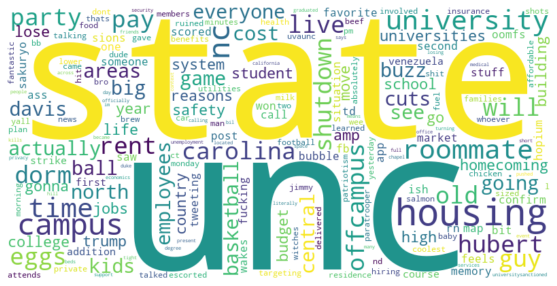

In [32]:
# ================================
# 6. Bag of Words
# ================================
all_words = " ".join(df["clean_tweet"]).split()
word_freq = Counter(all_words)

common_words = pd.DataFrame(word_freq.most_common(15), columns=["word", "count"])
print("Top words:\n", common_words)

# Word Cloud Visualization
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:

# ================================
# 7. Sentiment Analysis (VADER)
# ================================
sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["clean_tweet"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["label"] = df["sentiment"].apply(
    lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral")
)

# ================================
# 8. Thematic Coding
# ================================
themes = {
    "Frustration": ["shortage", "waitlist", "overcrowded", "problem", "struggling", "frustrated"],
    "Resilience": ["found", "moving in", "solution", "worked out", "finally"],
    "Community Support": ["roommate", "friend", "helped", "shared"],
    "Facilities": ["dorm", "old", "maintenance", "broken", "quality", "building"]
}

def assign_theme(tweet):
    for theme, keywords in themes.items():
        for kw in keywords:
            if kw in tweet.lower():
                return theme
    return "Other"

df["theme"] = df["clean_tweet"].apply(assign_theme)

In [25]:
# ================================
# 9. Summarize Data
# ================================
theme_summary = (
    df.groupby(["theme", "label"])
    .size()
    .reset_index(name="count")
)

theme_summary["percent"] = theme_summary.groupby("theme")["count"].apply(
    lambda x: (x / x.sum()) * 100
)

print(theme_summary)

# ================================
# 10. Dashboard with Dash
# ================================
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])

# Figures
overall_fig = px.pie(
    df, names="label", title="Overall Sentiment of NCCU Housing Tweets"
)

theme_fig = px.bar(
    theme_summary,
    x="theme",
    y="percent",
    color="label",
    barmode="group",
    title="Sentiment by Theme (Housing Shortage at NCCU)"
)

# Layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2("NCCU Housing Sentiment Dashboard"), className="mb-4")
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="overall", figure=overall_fig), md=6),
        dbc.Col(dcc.Graph(id="theme", figure=theme_fig), md=6)
    ]),
    dbc.Row([
        dbc.Col(html.H4("Sample Tweets by Theme"), className="mt-4")
    ]),
    dbc.Row([
        dbc.Col(dash_table.DataTable(
            id="tweet-table",
            columns=[{"name": c, "id": c} for c in ["clean_tweet", "label", "theme"]],
            page_size=5,
            style_table={'overflowX': 'auto'},
            style_cell={'textAlign': 'left'}
        ), md=12)
    ])
])

               theme     label  count  percent
0  Community Support   neutral      2     50.0
1  Community Support  positive      2     50.0
2         Facilities  negative      2     40.0
3         Facilities  positive      3     60.0
4              Other  negative      4     40.0
5              Other   neutral      1     10.0
6              Other  positive      5     50.0
7         Resilience   neutral      1    100.0


In [26]:
# Interactivity: Filter tweets by clicking bar in theme chart
@app.callback(
    Output("tweet-table", "data"),
    Input("theme", "clickData")
)
def display_tweets(clickData):
    if clickData:
        selected_theme = clickData["points"][0]["x"]
        return df[df["theme"] == selected_theme][["clean_tweet", "label", "theme"]].to_dict("records")
    else:
        return df[["clean_tweet", "label", "theme"]].sample(5).to_dict("records")

# Run app
if __name__ == "__main__":
    app.run(debug=True)